시작 연도를 입력하세요: 2001
마지막 연도를 입력하세요: 2021
기온변화를 측정할 달을 입력하세요: 8

2001년부터 2021년까지 8월의 기온 변화
8월 최저기온 평균:
23.7, 22.1, 21.7, 22.4, 22.9, 24.3, 24.2, 22.2, 22.2, 25.0, 23.1, 24.5, 25.0, 21.7, 22.0, 23.2, 22.5, 23.7, 23.7, 24.8, 22.4
8월 최고기온 평균:
31.4, 28.5, 29.2, 30.7, 31.0, 33.3, 32.0, 30.7, 29.7, 33.6, 30.3, 32.4, 34.4, 28.8, 31.2, 33.2, 31.4, 32.9, 32.2, 33.3, 30.5


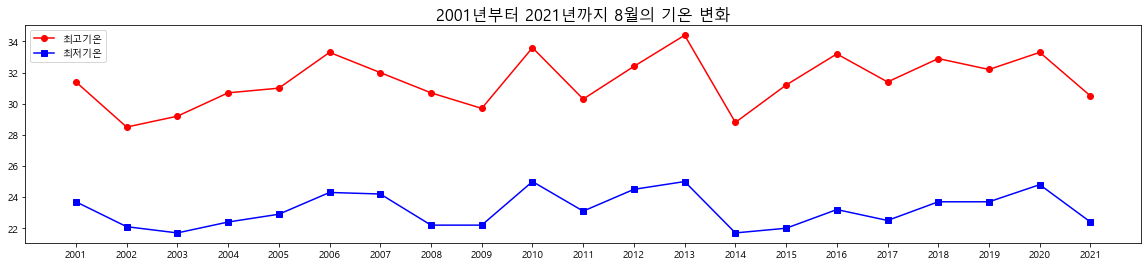

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm

temDF=pd.read_csv('daegu_utf8.csv')
temDF['날짜']=temDF['날짜'].astype('datetime64')
    
def draw_average_high_low_temp(start_year, end_year, month):
    
    duration = (end_year - start_year) + 1
    max_temp_list=[0] * duration  # 리스트에 0 을 넣어서 초기화 해주기
    min_temp_list=[0] * duration      # 크기 맞춰서 리스트 생성
    year_axis = [0] * duration
#     print(len(max_temp_list))
    
    for year in range(start_year, end_year+1):
        year_axis[year-start_year] = str(year)
        year_df = temDF[temDF['날짜'].dt.year == year]
        month_df = year_df[year_df['날짜'].dt.month == month]
        
        max_temp_list[year - start_year] = round(month_df['최고기온'].mean(), 1)
        min_temp_list[year - start_year] = round(month_df['최저기온'].mean(), 1)
#         max_temp_list.append(month_df['최고기온'].mean())   <- append 로 하면 리스트 갯수 안 곱해도 됨
    

    plt.figure(figsize=(20, 4))
    plt.plot(year_axis, max_temp_list,'red', marker='o', label='최고기온')
    plt.plot(year_axis, min_temp_list, 'blue', marker='s', label='최저기온')
    
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname='../Fonts/malgun.ttf').get_name()
        plt.rc('font', family=font_name)
#         plt.rc('font', family='Malgun Gothic', size=8)

    else:
        plt.rc('font', family='AppleGothic', size=8)

    print()
    print(f'{start_year}년부터 {end_year}년까지 {month}월의 기온 변화')
    print(f'{month}월 최저기온 평균:')
    print(*min_temp_list,sep=', ')
    print(f'{month}월 최고기온 평균:')
    print(*max_temp_list,sep=', ')

        
    plt.rcParams['axes.unicode_minus'] = False
    plt.title('{0}년부터 {1}년까지 {2}월의 기온 변화'.format(start_year, end_year, month), size = 16)
    plt.legend(loc=2)
    plt.show()
    

start_year=int(input('시작 연도를 입력하세요: '))
end_year=int(input('마지막 연도를 입력하세요: '))
month=int(input('기온변화를 측정할 달을 입력하세요: '))

draw_average_high_low_temp(start_year, end_year, month)